In [1]:
#import needed libraries
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Embedding, Input, Flatten
from keras.layers import LSTM, Bidirectional, GlobalMaxPool1D, Dropout, AveragePooling1D, AveragePooling2D
from keras.preprocessing import text, sequence
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.cross_validation import train_test_split

Using TensorFlow backend.
/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [46]:
df.head(n=20)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean,count_unique_word
0,22256635,"Nonsense? kiss off, geek. what I said is true...",1,0,0,0,0,0,False,14
1,27450690,"""\n\n Please do not vandalize pages, as you di...",0,0,0,0,0,0,True,24
2,54037174,"""\n\n """"Points of interest"""" \n\nI removed the...",0,0,0,0,0,0,True,54
3,77493077,Asking some his nationality is a Racial offenc...,0,0,0,0,0,0,True,24
4,79357270,The reader here is not going by my say so for ...,0,0,0,0,0,0,True,43
5,82428052,Fried chickens \n\nIs dat sum fried chickens?,0,0,0,0,0,0,True,7
6,87311443,Why can you put English for example on some pl...,0,0,0,0,0,0,True,18
7,114749757,Guy Fawkes \n\nim a resident in bridgwater and...,0,0,0,0,0,0,True,47
8,138560519,as far as nicknames go this article is embarra...,0,0,0,0,0,0,True,34
9,139353149,Woodland Meadows\nGood to hear that you correc...,0,0,0,0,0,0,True,9


In [48]:
df.tail(200)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean,count_unique_word
95651,997822048423,I hink you should sign your comments. but i ls...,0,0,0,0,0,0,True,29
95652,997837888176,"Hi Osmond, Please understand, I really like yo...",0,0,0,0,0,0,True,226
95653,997840105607,"""]] comment added by (talk • contribs) \n\nI'...",0,0,0,0,0,0,True,29
95654,997850024928,What is your name and editor that is valid on ...,0,0,0,0,0,0,True,17
95655,997863442014,"""\n\nI didn't edit A2 plane. I edited Reaction...",0,0,0,0,0,0,True,14
95656,997870595450,Public Opinion\n\nFrankly as a member of the U...,0,0,0,0,0,0,True,66
95657,997881993847,Spore (video game) consensus\nIf you check the...,0,0,0,0,0,0,True,31
95658,997894649315,List of schedules on ABC/NBC/CBS pages\n\nWiki...,0,0,0,0,0,0,True,99
95659,997898772453,New Legend starts here…incomparable Resort\n\n...,0,0,0,0,0,0,True,101
95660,997899224156,If you can't use it as a reliable source in th...,0,0,0,0,0,0,True,16


In [2]:
#read the input dataset
df = pd.read_csv("./train.csv")
#split the data into train and test sets
train, test = train_test_split(df, test_size=0.2)

In [11]:
df.shape
#959850 comments

(95851, 8)

In [14]:
x=df.iloc[:,2:].sum()
#marking comments without any tags as "clean"
rowsums=df.iloc[:,2:].sum(axis=1)
df['clean']=(rowsums==0)
#count number of clean entries
df['clean'].sum()
print("Total comments = ",len(df))
print("Total clean comments = ",df['clean'].sum())
print("Total tags =",x.sum())

Total comments =  95851
Total clean comments =  86061
Total tags = 21195.0


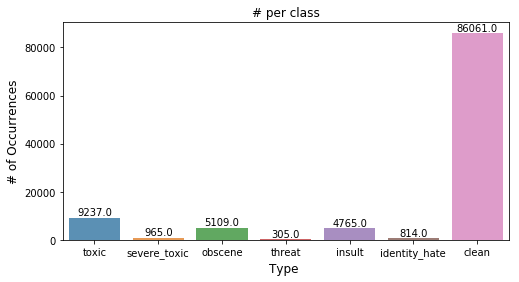

In [17]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
x=df.iloc[:,2:].sum()
#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("# per class")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('Type ', fontsize=12)
#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

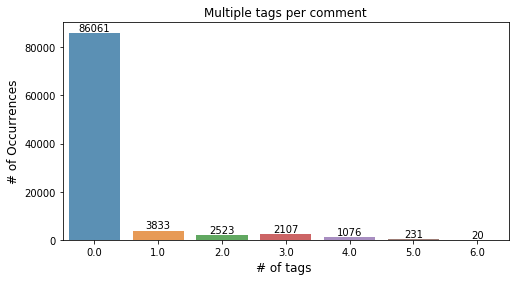

In [24]:

x=rowsums.value_counts()

#plot
plt.figure(figsize=(8,4))
ax = sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Multiple tags per comment")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('# of tags ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

'" May 2008 (UTC)\n\nNotability of Your New Heart\n A tag has been placed on Your New Heart requesting that it be speedily deleted from Wikipedia. This has been done because the article appears to be about a real person, organization (band, club, company, etc.), or web content, but it does not indicate how or why the subject is notable: that is, why an article about that subject should be included in an encyclopedia. Under the criteria for speedy deletion, articles that do not indicate the subject\'s importance or significance may be deleted at any time. Please see the guidelines for what is generally accepted as notable. If this is the first page that you have created, then you should read the guide to writing your first article.\n\nIf you think that you can assert the notability of the subject, you may contest the deletion by adding  to the top of the article (just below the existing speedy deletion or ""db"" tag), coupled with adding a note on the article\'s talk page explaining you

In [43]:
#Unique words
df['count_unique_word']=df["comment_text"].apply(lambda x: len(set(str(x).split())))

In [45]:
sum(pd.isnull(df["comment_text"]))

0

KeyError: 'Level cbarcelon must be same as name (None)'